# Characteristics of Second Order Systems

## Car Suspension: Spring-Mass-Damper System

A car suspension (shock absorbers) includes a spring and damper. The spring absorbs bumps in the road and the damper keeps the spring from oscillating too much.

![](https://www.howacarworks.com/illustration/127/coil-spring.base@1x.jpg)


We will use this classic example to understand the characteristics of second order linear systems. These ideas generalize to higher-order linear and nonlinear systems. Figure source: [How a Car Works](https://www.howacarworks.com/basics/how-car-springs-and-dampers-work)

### Mathematical Model

We will start with a free body diagram (figure source: [Wikipedia](https://en.wikipedia.org/wiki/Mass-spring-damper_model)) and sum of forces acting on mass $m$:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/4/45/Mass_spring_damper.svg/663px-Mass_spring_damper.svg.png)


$$\sum F = \quad \underbrace{-kx}_{\text{Hooke's~law}} \quad + \quad \underbrace{-c \dot{x}}_{\text{damper}} \quad + \quad \underbrace{f(t)}_{\text{input}} = \quad m \underbrace{\ddot{x}}_{\text{acceleration}}$$

We can rewrite this as a coupled system of linear ODEs:

$$
\dot{v} = -\frac{k}{m} x - \frac{c}{m} + \frac{f(t)}{m}, \qquad \dot{x} = v
$$

Let's assume the mass of the car is 450 kg per wheel. Furthermore, let's assume the spring constant $k$ is 100,000 N/m and the dampening constant $c$ is 2,000 Ns/m. Of course, this is a simplified model for a car suspection. See [this example](https://ctms.engin.umich.edu/CTMS/index.php?example=Suspension&section=SystemModeling) of a more sophisticate model of a bus' suspension.

### Numeric Simulation

Let's consider the empty car starts at rest. Then at time zero, the driver, who weighs 80 kg, gets into the car. The external forcing function is $-80 \text{kg} \times 9.81 \text{m} \text{s}^{-2} \times 1/4 = 196 \text{N}$ per tire. 

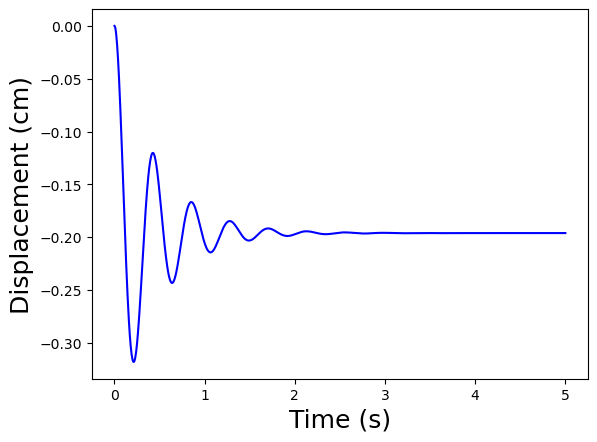

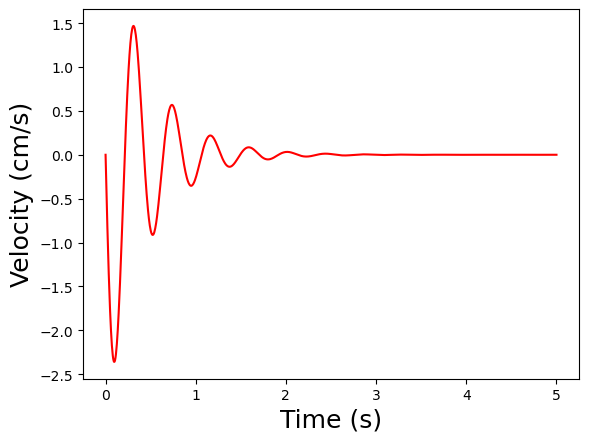

In [14]:
import scipy.integrate
import numpy as np
import matplotlib.pyplot as plt

def suspension(t, y, f= lambda t: 0.0, k=1E5, c=2E3, m=450):
    ''' Linear model of a car suspension system

    Arguments:
    t: time (s)
    y: array of the state variables [x, v] 
        where x is the displacement (m) and v is the velocity (m/s)
    f: extenal forcing function (N)
    k: spring constant (N/m)
    c: damping constant (Ns/m)
    m: mass per wheel (kg)
    '''

    # unpack state variables
    x, v = y

    # derivative of velocity
    vdot = (-k*x - c*v + f(t))/m

    # derivative of displacement
    xdot = v

    return np.array([xdot, vdot])


def simulate_driver_getting_in(driver_mass=80, k=1E5, c=2E3):
    ''' Simulate the suspension system with a step input (driver getting in)

    Arguments:
    driver_mass: mass of the driver (kg)
    k: spring constant (N/m)
    c: damping constant (Ns/m)

    '''


    initial_conditions = [0.0, 0.0]
    t_span = [0, 5]
    t_eval = np.linspace(*t_span, 1000)
    g = 9.81 # m/s^2

    driver_gets_in = lambda t,y: suspension(t, y, lambda t_: -driver_mass*g/4, k, c)

    solution = scipy.integrate.solve_ivp(driver_gets_in, t_span, initial_conditions, t_eval=t_eval)
    plt.plot(solution.t, solution.y[0]*100,color='b')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Displacement (cm)',fontsize=18)
    plt.show()

    plt.plot(solution.t, solution.y[1]*100,color='r')
    plt.xlabel('Time (s)',fontsize=18)
    plt.ylabel('Velocity (cm/s)',fontsize=18)
    plt.show()

simulate_driver_getting_in()

### Activity

Simulate the following what if scenarios:
* Double the spring stiffness
* Double the strength of the dampers
* Four people instead of one person gets in the car

Do the results make sense?

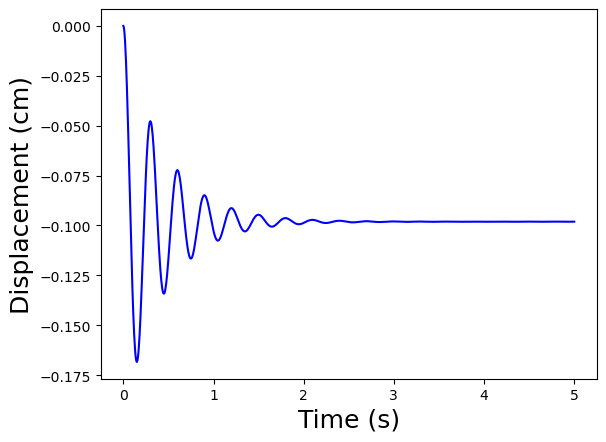

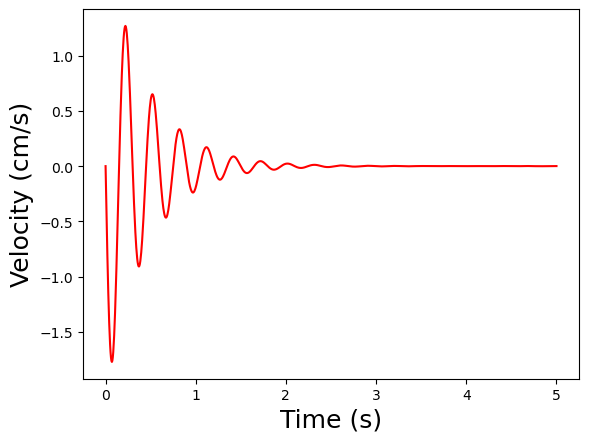

In [15]:
# Double the spring constant
simulate_driver_getting_in(k=2E5)

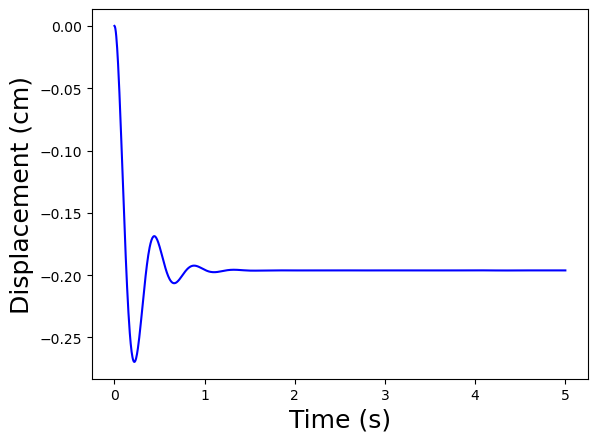

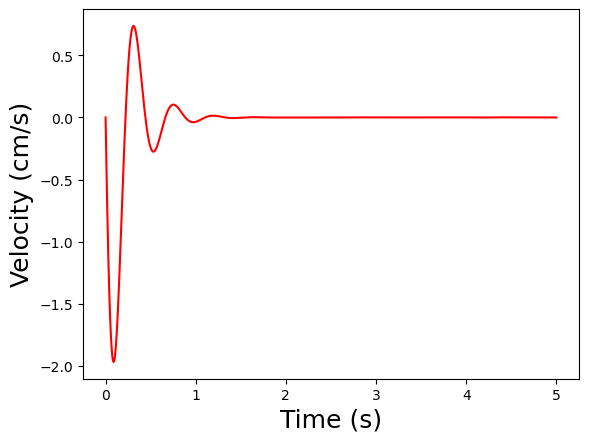

In [16]:
# Double the damping constant
simulate_driver_getting_in(c=4E3)

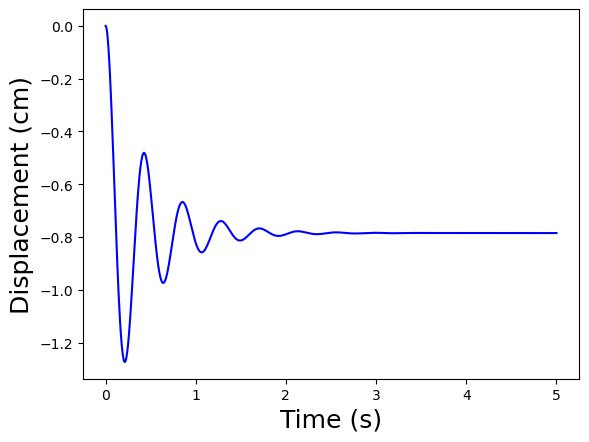

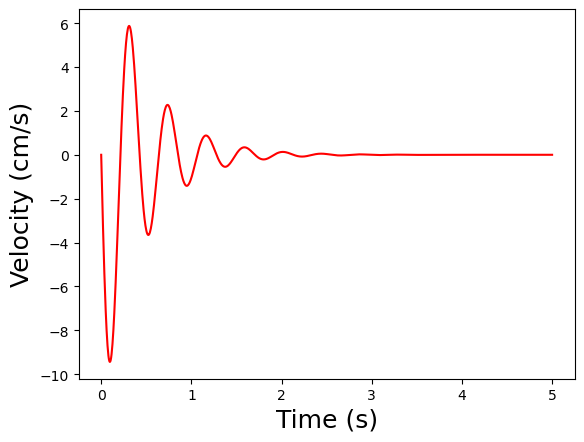

In [17]:
# Four people get in the car
simulate_driver_getting_in(driver_mass=4*80)

## Second Order Linear ODE Systems

### General Model

### Analytic Solution

### Spring-Mass-Damp Example

### Sensitivity of Eigenvalues

## General Linear ODE Systems

### Analytic Solution

### Simulation with `scipy.signal`

## Root Locus Analysis

### Main Idea

### Calculation with `scipy.signal`

## Frequency Response

### Motivation

### Calculation with `scipy.signal`